# Data Analysis and Data Science
## Putting it all together

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 7th 2022

<hr style="border:1px solid black"> </hr>


Name: Poinsignon Thérèse-Marie

In [35]:
### Import sklearn
import seaborn as sns
import sklearn.decomposition
import sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

In [37]:
!pwd

/u/poinsigt


## Data Analysis II: k-means for clustering datapoints

In [38]:
### Import and clean the penguins dataset
data_penguin = pd.read_csv("palmer_penguins.csv", sep=",", header=0)
data_penguin.dropna(axis="index", inplace=True)
data_penguin = data_penguin.reset_index(drop=True)

In [39]:
### Do dimensionality reduction through PCA
X = data_penguin.iloc[:, 2:6]

# Data scaling
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X) 

# Initiate the PCA and apply it to the scaled data
pca = sklearn.decomposition.PCA(n_components=4)
pca.fit(X_scaled)

# Apply the dimensionality reduction to our data
X_reduce = pca.fit_transform(X_scaled)

reduce_penguin = pd.DataFrame(X_reduce)
reduce_penguin["species"] = data_penguin.species
reduce_penguin["island"] = data_penguin.island
reduce_penguin["sex"] = data_penguin.sex

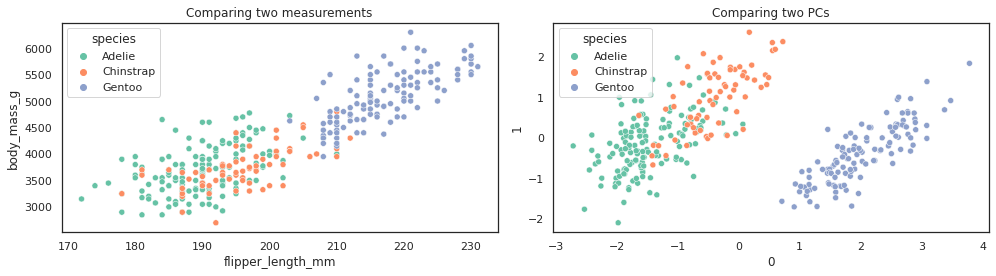

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.scatterplot(data=data_penguin, x="flipper_length_mm", y="body_mass_g", hue="species", ax=ax[0])
ax[0].set_title("Comparing two measurements")

sns.scatterplot(data=reduce_penguin, x=0, y=1, hue="species", ax=ax[1])
ax[1].set_title("Comparing two PCs")

plt.tight_layout()
plt.show()

We wish to group similar samples and compare the groups to catagorical labels.

### k-means with scikit-learn

The KMeans algorithm clusters data by trying to separate samples in $n$ groups of equal variance, minimizing a criterion known as **within-cluster sum-of-squares**.

This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

At a glance, the k-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean $\mu_{j}$ of the samples in the cluster $C_{j}$. 

*In very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.*

Ressource: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

Let's apply the k-means algorithm to the first two principal component of the Iris dataset. **Are we able to cluster pengouins based on the species?

In [41]:
data_penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [42]:
### Define the data
#P =  data_penguin.loc[:,["flipper_length_mm","body_mass_g"]]
P =  data_penguin.iloc[:,2:6] #on prends toutes les valeurs numériques du tableau
P.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [8]:
random.seed(0)

NameError: name 'random' is not defined

In [43]:
### Initiate the k-means alogirthm
### How many cluster should we use?
K = 3
kmean = sklearn.cluster.KMeans(n_clusters=K)
kmean

KMeans(n_clusters=3)

In [44]:
### Apply kmeans to our data
kmeans_P = kmean.fit(P)

**Attributes of the kmeans object:**

<code>kmeans.cluster_centers_</code>: coordinates of cluster centers

<code>kmeans.labels_</code>: labels of each point

In [45]:
### Get centroids coordinate
kmeans_P.cluster_centers_ #quand on rerun les clusters on a les memes mais dans un 

array([[  41.2863354 ,   18.03726708,  190.08695652, 3522.04968944],
       [  48.93571429,   15.53142857,  220.61428571, 5435.35714286],
       [  44.87254902,   16.90882353,  204.65686275, 4445.34313725]])

In [46]:
### Get datapoints labels
kmeans_P.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,

In [47]:
### Add the cluster column
data_penguin.loc[:,"cluster"] = kmeans_P.labels_

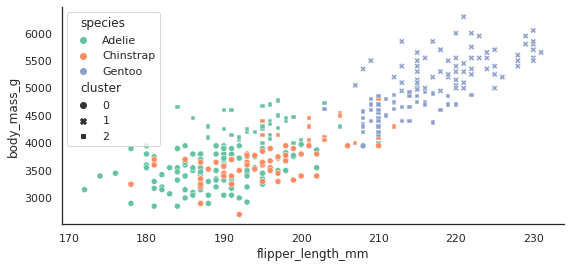

In [48]:
### Plot the cluster and the labels
sns.scatterplot(data=data_penguin, x="flipper_length_mm", y="body_mass_g", hue="species", style="cluster")
sns.despine()
#les data semblent plus étalées

In [79]:
### Instead of using measurements values, cluster penguins based on the result of the dimensionality reduction


It is not always easy to define the number of cluster to use!

The most common approach for deciding the value of $K$ is the so-called elbow method. It involves running the algorithm multiple times over a loop, with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.

<code>inertia_</code>: sum of squared distances of samples to their closest cluster center

In [49]:
### Get the inertia of our initial kmean
kmeans_P.inertia_
#l'inertie est grande quand les clusters sont proches de tous

28336434.865731087

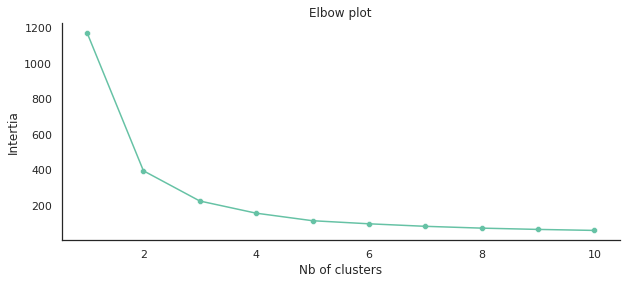

In [50]:
### Run kmeans for various k values
### initiate empty list
inertia_list = []

X = reduce_penguin.iloc[:, 0:2]

### Create for loop for K from 1 to 10
for k in range(1, 11) :
    kmean = sklearn.cluster.KMeans(n_clusters=k)
    kmeans_X = kmean.fit(X)
    
    ## Add the inertia to the list
    inertia_list += [kmeans_X.inertia_]
    
### Plot K vs. intertia
plt.figure(figsize=(10, 4))
sns.lineplot(x=np.arange(1, 11), y=inertia_list)
sns.scatterplot(x=np.arange(1, 11), y=inertia_list)

plt.title("Elbow plot")
plt.xlabel("Nb of clusters")
plt.ylabel("Intertia")

sns.despine()
#plus on a de clusters, et moins on aura d'inertie

## Data Analysis III: Putting it all together!

You are given a dataset of gene experissions for $N$ samples. Each sample represent a breast cancer patient. 
The dataset comprises two TSV files:
* `patient_expression.tsv`: contains the expressions of $M$ genes for each of the `N` patients;
* `patient_subtype.tsx`: contains the clinical classification of each patient;

The order is the same for all files.

You wonder if you can cluster patient, from their expression profil, by clinical classification.
** The expression values are already log-transformed

### Create a dataframe of the data

In [71]:
import pandas as pd
import seaborn as sns
import scipy as sp
data_expression = pd.read_csv("breast_cancer_expression.tsv", sep="\t", header=0)


In [72]:
data_subtype= pd.read_csv("breast_cancer_subtype.tsv", sep="\t", header=(None))
data_subtype

,0
0,Basal
1,Basal
2,Basal
3,Basal
4,Basal
...,...
640,Normal
641,Normal
642,Normal
643,Normal


In [74]:
datatotal=pd.concat([data_subtype, data_expression], axis=1)
datatotal.rename({0 : "clinical_class"}, axis=1, inplace=True)
datatotal

,clinical_class,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
0,Basal,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,Basal,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,Basal,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,Basal,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,Basal,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,Normal,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,...,2.522965,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799
641,Normal,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,...,1.989089,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657
642,Normal,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,...,1.953431,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375
643,Normal,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,...,0.820314,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823


### Explore the data [35 points]

<hr>

#### Part 1 [15 points]
Answer the following questions:
1. How many patients are you considering? il y a 645 patients
2. How many genes are you considering? ily a 48 gènes
3. Is there a pair of genes that seems to be linearly correlated? If yes, which genes and what is the correlation coefficient? Yes, ENSG00000115648.12  vs.  ENSG00000129514.5  ------> 0.91 et ENSG00000117399.12  vs.  ENSG00000142945.11  ------> 0.92

In [75]:
#nombre de patients:
len(data_subtype)

645

In [76]:
#nombre de gènes : 
len(data_expression.columns)

47

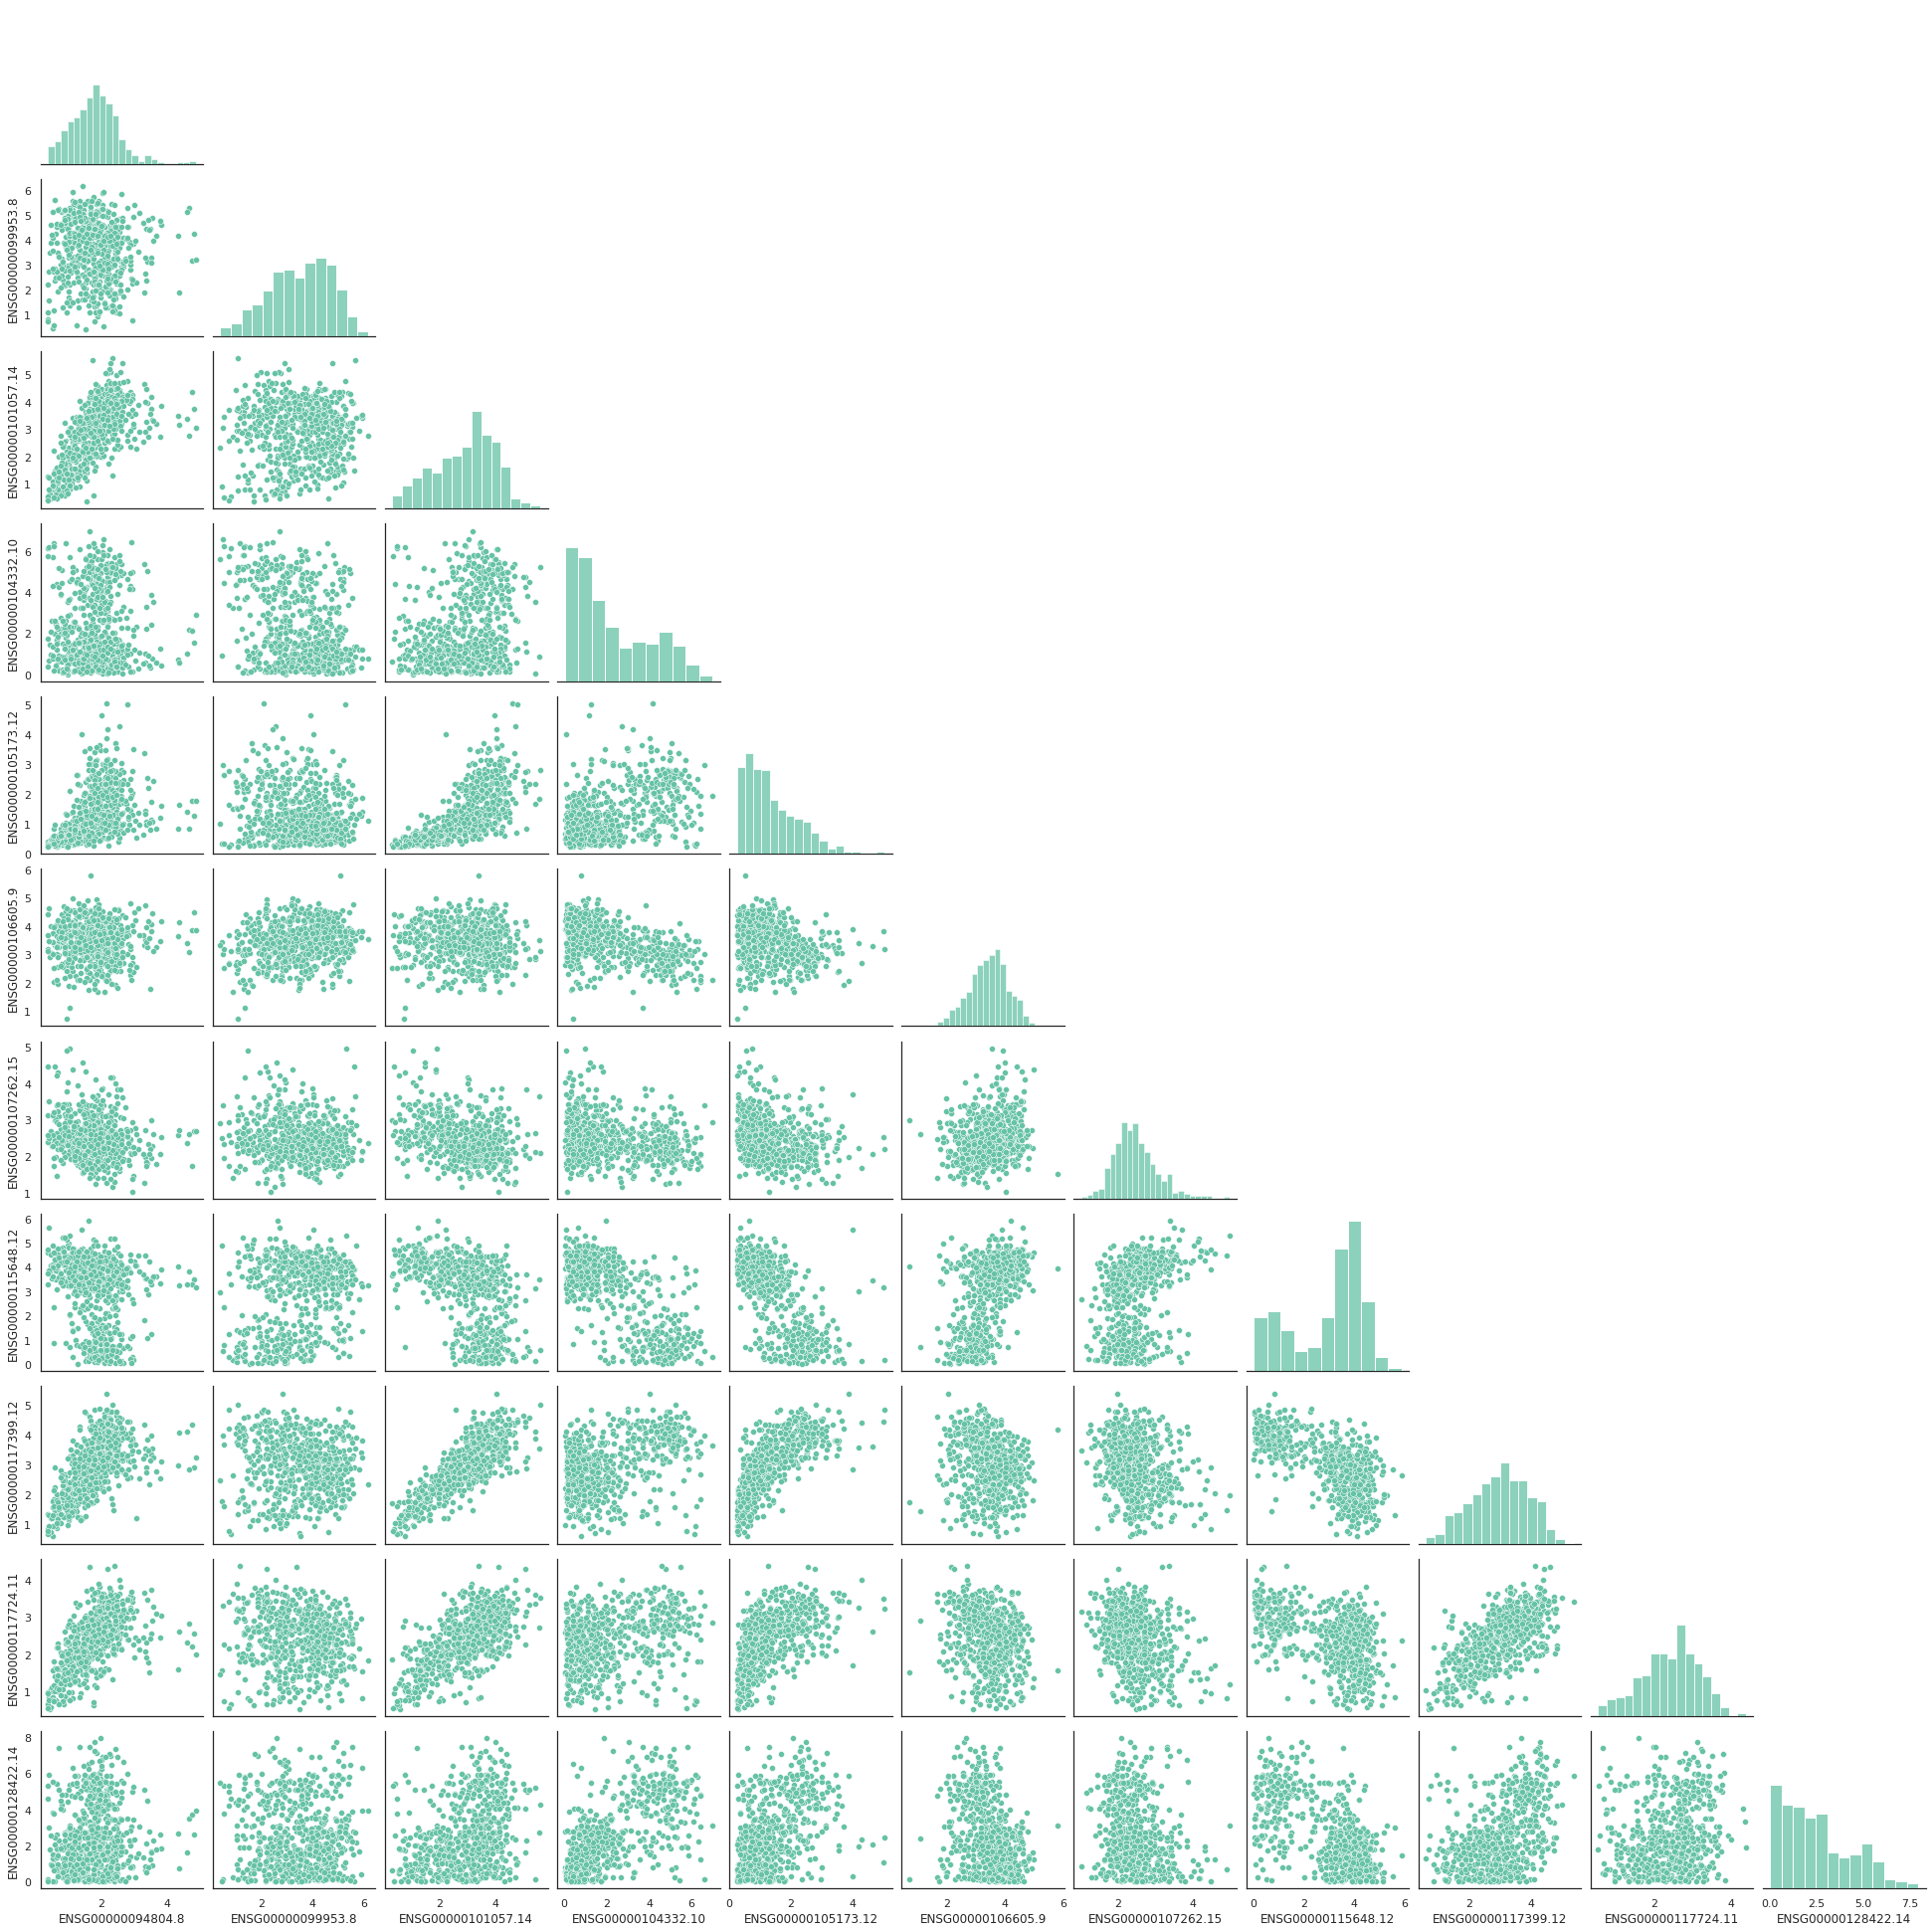

In [77]:
sns.pairplot(datatotal.iloc[:, 9:20], corner=True)

ENSG00000115648.12  vs.  ENSG00000129514.5  ------> 0.91
ENSG00000117399.12  vs.  ENSG00000142945.11  ------> 0.92


In [78]:
#en testant le gene ENSG00000117399.12 et le gène ENSG00000142945.11 : 
reg = sp.stats.linregress(x=datatotal["ENSG00000117399.12"], y=datatotal["ENSG00000142945.11"])
reg.rvalue

0.9176074418537264

In [79]:
#en testant le gene ENSG00000115648.12 et le gène ENSG00000129514.5 : 
reg = sp.stats.linregress(x=datatotal["ENSG00000115648.12"], y=datatotal["ENSG00000129514.5"])
reg.rvalue

0.9071810120632687

<hr>

#### Part 2 [20 points]
Visually inspect your dataset by generating at least two (2) graphs. For each visualisation you should:
* State what you are exploring;
* Plot comprehensive graphs (title, axis-labels, legend if necesssary);
* Give a consise interpretation of the results.

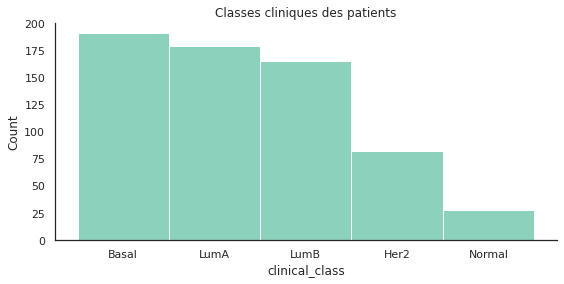

In [80]:
#On pourrait regarder la repartition des patients en fonction de leur sous type d'expression
sns.histplot(data=datatotal, x="clinical_class")
plt.title("Classes cliniques des patients")
sns.despine()

#--> les patients sont surtout en classe "basale"

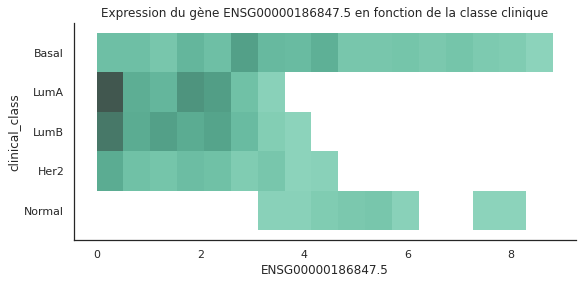

In [81]:
#On pourrait regarder l'expression d'un gène spécifique ENSG00000186847.5 enfonction de la classe clinique
sns.histplot(data=datatotal, x="ENSG00000186847.5", y="clinical_class")
plt.title("Expression du gène ENSG00000186847.5 en fonction de la classe clinique")
sns.despine()

Text(0.5, 1.0, 'Distribution des sous types des gènes ENSG00000117399.12 et ENSG00000142945.11')

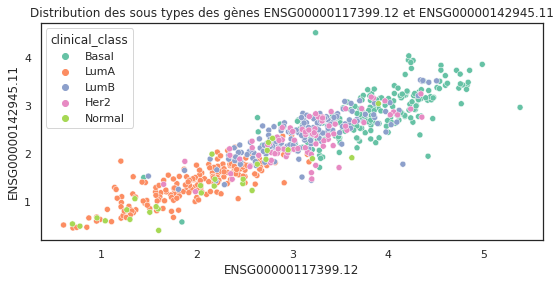

In [82]:
#en fonction des gènes qu'on a étudié juste avant avec les ratios:
sns.scatterplot(data=datatotal, x="ENSG00000117399.12", y="ENSG00000142945.11", hue="clinical_class")
plt.title("Distribution des sous types des gènes ENSG00000117399.12 et ENSG00000142945.11")

on remarque un lien potentiel entre l'expression des gènes et la classe clinique

<hr style="border:1px solid black"> </hr>

### Analyse the data [60 points]

You are wondering if it would be possible to group patients in various subsets. 

<hr>

#### Part 1 [20 points]

Using the methods presented in previous class, are you able to group patients in various subsets?

Make sure that each step of your analysis is clearly identifiable. When you make decision regarding algorithm parameters, make sure to justify them with a short sentence and a plot (if applicable).

For each results generated, give a concise interpretation.

In [83]:
X=datatotal.iloc[:,1:48]
pca = sklearn.decomposition.PCA(n_components = 2)
pca.fit(X)

#new scalaire : 
scaler = sklearn.preprocessing.StandardScaler()

#learn pattern from input data
scaler.fit(X)

#apply pattern
X_scaled = scaler.transform(X)

#Initiate PCA and apply to the scaled data
pca=sklearn.decomposition.PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

PCA(n_components=47)

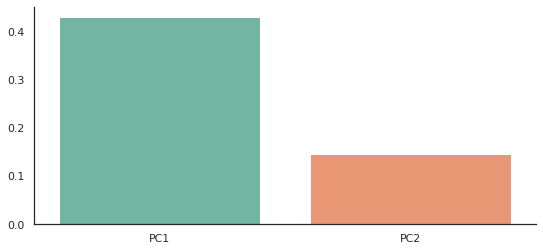

In [84]:
sns.barplot(x=["PC1", "PC2"], y=pca.explained_variance_ratio_)
sns.despine()

<AxesSubplot:xlabel='0', ylabel='1'>

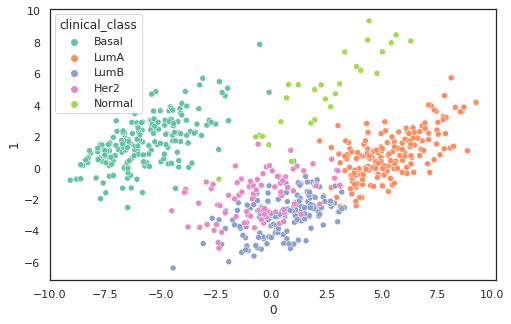

In [87]:
X_reduce=pca.fit_transform(X_scaled)

reduce_datatotal=pd.DataFrame(X_reduce)
reduce_datatotal["clinical_class"]=datatotal["clinical_class"]
plt.figure(figsize=(8,5))
sns.scatterplot(data=reduce_datatotal, x=0, y=1, hue="clinical_class")

Are you able to link each found cluster to a cancer subtype?

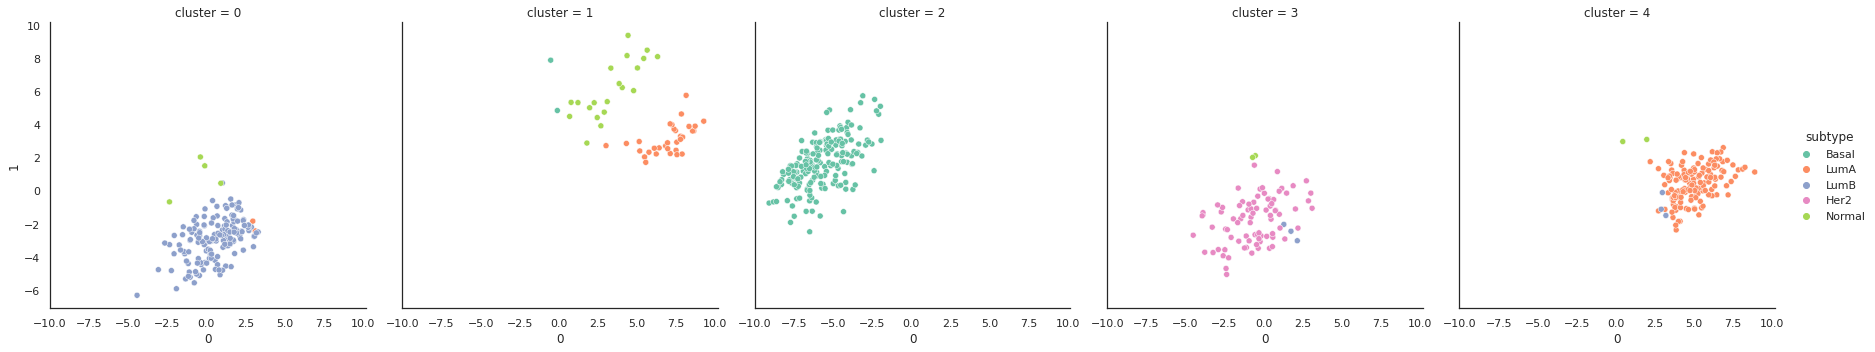

In [ ]:
#si on selectionne uniquement en fonction de la plage de donnée d'un sous type, on peut remarquer qu'il peut y avoir d'autres
# sous-types qui en font également partie

<hr>

#### Part 2

Go back the pair(s) of genes with high linear correlation. Do their expressions differ from one to subtype to another? If so, how?

Text(0.5, 1.0, 'Distribution des sous types des gènes ENSG00000117399.12 et ENSG00000142945.11')

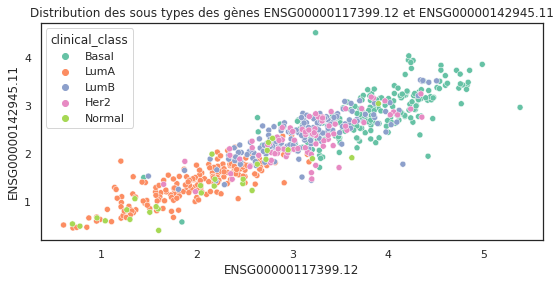

In [89]:
#Oui, les sous types "Her2" et "Normal" sont proches l'un de l'autre
#Les trois autres sous-types sont ensembles et detiennent une expression de gène forte

sns.scatterplot(data=datatotal, x="ENSG00000117399.12", y="ENSG00000142945.11", hue="clinical_class")

plt.title("Distribution des sous types des gènes ENSG00000117399.12 et ENSG00000142945.11")

<hr>

#### BONUS

For each cancer subtype, identify the most expressed gene (on average). Do you find a different gene for each cluster?

If you do a rapid literrature search, are there identified genes known to be link to their respective subtype?

<hr style="border:1px solid black"> </hr>

## Share your work

You are almost done!!

Once you are done with the exercices and are happy with your results, **push your Notebook to your GitHub account**.

Make sure that you've saved you Notebook before your final commit and push!

You last commit/push needs to be dated before **July 16th, 1:00 PM**.

Finally, **submit the URL to your GitHub account (https://github.com/HANDLE) to StudiUM.**

<hr style="border:1px solid black"> </hr>

# Good Job!

Yeah! You've just finish the last assignment for the Data Science & Data Analysis bloc of BIM6065: Congratulations 🎉

You guys did an amazing job over the last two weeks: you should be proud of yourselves!

I wish you the very best in your Master!